# 1. Описание базы данных
`База данных представляет собой продажи авокадо`

1. `Date` - Дата
2. `AveragePrice` - Средняя цена одного авокадо
3. `Total Volume` - Общее количество проданных авокадо
4. `4046` - Общее количество проданных авокадо с PLU 4046
5. `4225` - Общее количество проданных авокадо с PLU 4225
6. `4770` - Общее количество проданных авокадо с PLU 4770
7. `Total Bags` - Продано мешков
8. `Small Bags` - Маленькие мешки
9. `Large Bags` - Большие мешки
10. `XLarge Bags` - Огромные мешки
11. `type` - Обычные или органические
12. `year` - Год
13. `region` - Город или район наблюдения


In [27]:
from operator import itemgetter
import matplotlib. pyplot as plt
import matplotlib. ticker as ticker
import numpy as np
import pandas as pd
import math
from simple_kNN import *

In [28]:
avocado = pd.read_csv('avocado.csv', sep=",")

In [29]:
avocado.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [30]:
avocado.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [31]:
# Регресси по XLarge Bags
def regr_to_class(y: float) -> str:
    if   y < 100000:
        result = 'A'
    elif y < 200000:
        result = 'B'
    elif y < 400000:
        result = 'C'
    else:
        result = 'D'
    return result

# Формирование целевого признака

In [32]:
avocado1 = avocado

avocado1['XLarge_class'] = \
avocado1.apply(lambda row: regr_to_class(row['XLarge Bags']), axis=1)

In [33]:
avocado1[avocado1['XLarge Bags'] > 100000]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,XLarge_class
2341,1,2015-12-20,0.81,4565207.85,2166801.03,1226508.86,412828.75,759069.21,555356.92,95639.50,108072.79,conventional,2015,SouthCentral,B
2652,0,2015-12-27,0.95,27297983.67,9626901.09,10197890.05,1184340.09,6288852.44,4850404.09,1252626.31,185822.04,conventional,2015,TotalUS,B
2653,1,2015-12-20,0.98,25083647.17,8710021.76,9329861.85,1201020.01,5842743.55,4618389.66,1025048.77,199305.12,conventional,2015,TotalUS,B
3612,24,2016-07-10,1.24,3327062.20,478536.66,1500516.86,328564.87,1019443.81,686496.96,228290.63,104656.22,conventional,2016,GreatLakes,B
3613,25,2016-07-03,1.13,4020724.58,574425.88,1781703.48,367119.34,1297475.88,930189.98,261535.63,105750.27,conventional,2016,GreatLakes,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9097,7,2018-02-04,0.87,62505646.52,21620180.90,20445501.03,1066830.22,19373134.37,13384586.80,5719096.61,269450.96,conventional,2018,TotalUS,C
9098,8,2018-01-28,1.09,40171640.84,14551799.50,12119884.61,575974.74,12923981.99,9749412.19,3041125.42,133444.38,conventional,2018,TotalUS,B
9099,9,2018-01-21,1.08,42939821.55,14218843.83,13929702.12,928815.12,13862460.48,9866218.28,3789722.90,206519.30,conventional,2018,TotalUS,C
9100,10,2018-01-14,1.20,37299945.22,12600918.24,11866197.84,652808.40,12180020.74,8128241.88,3917569.95,134208.91,conventional,2018,TotalUS,B


## Классификация

In [34]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

In [35]:
kNc = KNeighborsClassifier(n_neighbors=3)

In [36]:
kNc.fit(avocado1[['XLarge Bags']], avocado1['XLarge_class'])
kNc.predict(avocado1[['XLarge Bags']])

array(['A', 'A', 'A', ..., 'A', 'A', 'A'], dtype=object)

## Регрессия

In [37]:
kNr = KNeighborsRegressor()

In [38]:
kNr.fit(avocado1[['XLarge Bags']], avocado1['AveragePrice'])
kNr.predict(avocado1[['XLarge Bags']])

array([1.052, 1.052, 1.052, ..., 1.052, 1.052, 1.052])

# Подготовка данных и построение базовых моделей для оценки качества

In [39]:
from sklearn.datasets import *
from typing import Dict, Tuple
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
import seaborn as sns
import matplotlib. pyplot as plt
%matplotlib inline
sns. set(style="ticks")

In [40]:
# boston_prices = load_boston()
wine = load_wine()

In [41]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [42]:
np.unique(wine.target)

array([0, 1, 2])

In [43]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [44]:
list(zip(np.unique(wine.target), wine.target_names))

[(0, 'class_0'), (1, 'class_1'), (2, 'class_2')]

In [45]:
wine.data.shape, wine.target.shape

((178, 13), (178,))

In [46]:
# Сформируем DataFrame
wine_df = pd.DataFrame(data=np.c_[wine['data'], wine['target']], columns=wine['feature_names'] + ['target'])

In [47]:
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [48]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


# Разделение выборки на обучающую и тестовую

In [49]:
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(wine.data, wine.target, test_size=0.5, random_state=1)

In [50]:
wine_X_train.shape, wine_y_train.shape

((89, 13), (89,))

In [51]:
wine_X_test.shape, wine_y_test.shape

((89, 13), (89,))

In [52]:
np.unique(wine_y_train)

array([0, 1, 2])

In [53]:
np.unique(wine_y_test)

array([0, 1, 2])

In [54]:
def class_proportions(array: np.ndarray) -> Dict[int, Tuple[int, float]]:
    labels, counts = np.unique(array, return_counts=True)
    counts_perc = counts/array.size
    res = dict()
    for label, count2 in zip(labels, zip(counts, counts_perc)):
        res[label] = count2
    return res

def print_class_proportions(array: np.ndarray):
    proportions = class_proportions(array)
    if len(proportions)>0:
        print('Метка \t Количество \t Процент встречаемости')
    for i in proportions:
        val, val_perc = proportions[i]
        val_perc_100 = round(val_perc * 100, 2)
        print('{} \t {} \t \t {}%'.format(i, val, val_perc_100))

In [55]:
print_class_proportions(wine.target)

Метка 	 Количество 	 Процент встречаемости
0 	 59 	 	 33.15%
1 	 71 	 	 39.89%
2 	 48 	 	 26.97%


In [56]:
print_class_proportions(wine_y_train)

Метка 	 Количество 	 Процент встречаемости
0 	 26 	 	 29.21%
1 	 37 	 	 41.57%
2 	 26 	 	 29.21%


In [57]:
print_class_proportions(wine_y_test)

Метка 	 Количество 	 Процент встречаемости
0 	 33 	 	 37.08%
1 	 34 	 	 38.2%
2 	 22 	 	 24.72%


# Построение базовой модели на основе ближайших соседей

In [58]:
# 2 ближайших соседа
cl1_1 = KNeighborsClassifier(n_neighbors=2)
cl1_1.fit(wine_X_train, wine_y_train)
target1_1 = cl1_1.predict(wine_X_test)
len(target1_1), target1_1

(89,
 array([0, 1, 2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0,
        1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
        1]))

In [59]:
# 10 ближайших соседа
cl1_2 = KNeighborsClassifier(n_neighbors=10)
cl1_2.fit(wine_X_train, wine_y_train)
target1_2 = cl1_2.predict(wine_X_test)
len(target1_2), target1_2

(89,
 array([1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
        2, 0, 2, 1, 0, 0, 0, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 2,
        0, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 2, 2, 1, 0,
        1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0,
        1]))

# Метрики качества классификации

In [60]:
accuracy_score(wine_y_test, target1_1)

0.6404494382022472

In [61]:
accuracy_score(wine_y_test, target1_2)

0.6629213483146067

In [62]:
def accuracy_score_for_classes(
    y_true: np.ndarray,
    y_pred: np.ndarray) -> Dict[int, float]:
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    classes = np.unique(y_true)
    res = dict()
    for c in classes:
        temp_data_flt = df[df['t']==c]
        temp_acc = accuracy_score(
            temp_data_flt['t']. values,
            temp_data_flt['p']. values)
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np. ndarray,
    y_pred: np.ndarray):
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [63]:
print_accuracy_score_for_classes(wine_y_test, target1_1)

Метка 	 Accuracy
0 	 0.7878787878787878
1 	 0.8529411764705882
2 	 0.09090909090909091


In [64]:
print_accuracy_score_for_classes(wine_y_test, target1_2)


Метка 	 Accuracy
0 	 0.7878787878787878
1 	 0.8235294117647058
2 	 0.22727272727272727


In [65]:
# Конвертация целевого признака в бинарный
def convert_target_to_binary(array:np.ndarray, target:int) -> np.ndarray:
    # Если целевой признак совпадает с указанным, то 1 иначе 0
    res = [1 if x==target else 0 for x in array]
    return res

In [66]:
# Если целевой признак ==2,
# то будем считать этот случай 1 в бинарном признаке
bin_wine_y_train = convert_target_to_binary(wine_y_train, 2)
list(zip(wine_y_train, bin_wine_y_train))[:10]

[(1, 0),
 (1, 0),
 (0, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (2, 1),
 (1, 0),
 (1, 0),
 (1, 0)]

In [67]:
bin_wine_y_test = convert_target_to_binary(wine_y_train, 2)
list(zip(wine_y_test, bin_wine_y_test))[:10]

[(2, 0),
 (1, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (2, 0),
 (1, 1),
 (0, 0),
 (2, 0),
 (1, 0)]

In [68]:
# Конвертация предсказанных признаков
bin_target1_1 = convert_target_to_binary(target1_1, 2)
bin_target1_2 = convert_target_to_binary(target1_2, 2)
balanced_accuracy_score(bin_wine_y_test, bin_target1_1)

0.5067155067155067

In [69]:
balanced_accuracy_score(bin_wine_y_test, bin_target1_2)

0.4896214896214896

# Матрица ошибок

In [70]:
confusion_matrix(bin_wine_y_test, bin_target1_1, labels=[0, 1])

array([[59,  4],
       [24,  2]], dtype=int64)

In [71]:
tn, fp, fn, tp = confusion_matrix(bin_wine_y_test, bin_target1_1).ravel()
tn, fp, fn, tp

(59, 4, 24, 2)

In [72]:
# Пример для небинарной классификации
confusion_matrix(wine_y_test, target1_1, labels=[0, 1, 2])

array([[26,  5,  2],
       [ 3, 29,  2],
       [ 4, 16,  2]], dtype=int64)

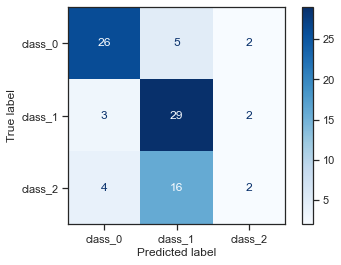

In [73]:
plot_confusion_matrix(cl1_1, wine_X_test, wine_y_test, 
                      display_labels=wine.target_names, cmap=plt.cm.Blues)

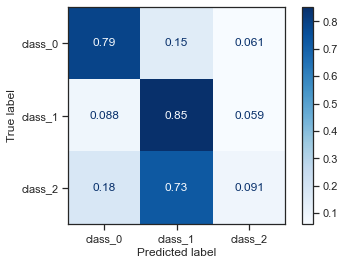

In [74]:
plot_confusion_matrix(cl1_1, wine_X_test, wine_y_test, 
                      display_labels=wine.target_names, 
                      cmap=plt.cm.Blues, normalize='true')

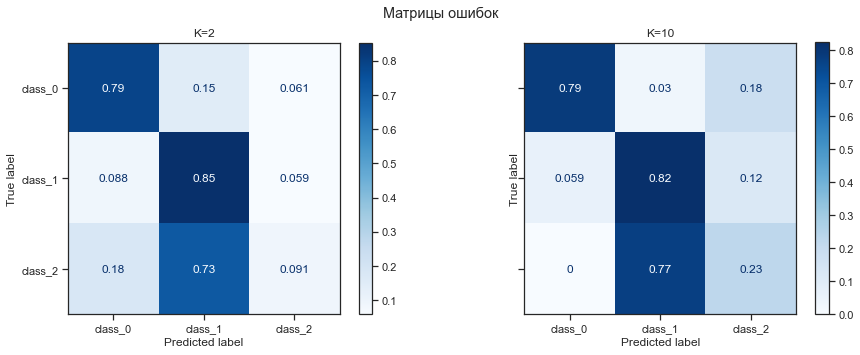

In [75]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,5))

plot_confusion_matrix(cl1_1, wine_X_test, wine_y_test, 
                      display_labels=wine.target_names, 
                      cmap=plt.cm.Blues, normalize='true', ax=ax[0])

plot_confusion_matrix(cl1_2, wine_X_test, wine_y_test, 
                      display_labels=wine.target_names, 
                      cmap=plt.cm.Blues, normalize='true', ax=ax[1])

fig.suptitle('Матрицы ошибок')
ax[0].title.set_text('K=2')
ax[1].title.set_text('K=10')

# Precision, recall и F-мера

In [76]:
# По умолчанию метрики считаются для 1 класса бинарной классификации
# Для 2 ближайших соседей
precision_score(bin_wine_y_test, bin_target1_1), recall_score(bin_wine_y_test, bin_target1_1)

(0.3333333333333333, 0.07692307692307693)

In [77]:
# Для 10 ближайших соседей
precision_score(bin_wine_y_test, bin_target1_2), recall_score(bin_wine_y_test, bin_target1_2)

(0.26666666666666666, 0.15384615384615385)

In [78]:
# Параметры TP, TN, FP, FN считаются как сумма по всем классам
precision_score(wine_y_test, target1_1, average='micro')

0.6404494382022472

In [79]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется среднее значение, дисбаланс классов не учитывается.
precision_score(wine_y_test, target1_1, average='macro')

0.567070707070707

In [80]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется средневзвешенное значение, дисбаланс классов учитывается 
# в виде веса классов (вес - количество истинных значений каждого класса).
precision_score(wine_y_test, target1_1, average='weighted')

0.5961048689138577

# F-мера

In [81]:
f1_score(bin_wine_y_test, bin_target1_2)

0.1951219512195122

In [82]:
f1_score(wine_y_test, target1_1, average='micro')

0.6404494382022472

In [83]:
f1_score(wine_y_test, target1_1, average='macro')

0.5404040404040403

In [84]:
f1_score(wine_y_test, target1_1, average='weighted')

0.5912252541466024

In [85]:
classification_report(wine_y_test, target1_1, 
                      target_names=wine.target_names, output_dict=True)

{'class_0': {'precision': 0.7878787878787878,
  'recall': 0.7878787878787878,
  'f1-score': 0.7878787878787878,
  'support': 33},
 'class_1': {'precision': 0.58,
  'recall': 0.8529411764705882,
  'f1-score': 0.6904761904761905,
  'support': 34},
 'class_2': {'precision': 0.3333333333333333,
  'recall': 0.09090909090909091,
  'f1-score': 0.14285714285714288,
  'support': 22},
 'accuracy': 0.6404494382022472,
 'macro avg': {'precision': 0.567070707070707,
  'recall': 0.5772430184194889,
  'f1-score': 0.5404040404040403,
  'support': 89},
 'weighted avg': {'precision': 0.5961048689138577,
  'recall': 0.6404494382022472,
  'f1-score': 0.5912252541466024,
  'support': 89}}

# ROC-кривая и ROC AUC

In [86]:
# Обучим модели на задаче бинарной классифкации, 
# чтобы получить вероятности классов

# 2 ближайших соседа
bin_cl1_1 = KNeighborsClassifier(n_neighbors=2)
bin_cl1_1.fit(wine_X_train, bin_wine_y_train)
# предскажем метки классов
bin_cl1_1.predict(wine_X_test)

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [87]:
bin_cl1_1.classes_

array([0, 1])

In [88]:
# предскажем вероятности классов
proba_target1_1 = bin_cl1_1.predict_proba(wine_X_test)
len(proba_target1_1), proba_target1_1

(89,
 array([[1. , 0. ],
        [1. , 0. ],
        [0. , 1. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [0. , 1. ],
        [1. , 0. ],
        [0.5, 0.5],
        [1. , 0. ],
        [1. , 0. ],
        [0.5, 0.5],
        [1. , 0. ],
        [1. , 0. ],
        [0. , 1. ],
        [1. , 0. ],
        [1. , 0. ],
        [0.5, 0.5],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [0.5, 0.5],
        [1. , 0. ],
        [0.5, 0.5],
        [0.5, 0.5],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [0.5, 0.5],
        [1. , 0. ],
        [1. , 0. ],
        [0.5, 0.5],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [0.5, 0.5],
        [0.5, 0.5],
        [1. , 0. ],
        [1. , 0. ],
        [0.5, 0.5],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0

In [89]:
# вероятность единичного (истинного) класса
true_proba_target1_1 = proba_target1_1[:,1]
true_proba_target1_1

array([0. , 0. , 1. , 0. , 0. , 0. , 1. , 0. , 0.5, 0. , 0. , 0.5, 0. ,
       0. , 1. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0.5,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0.5, 0. ,
       0. , 0. , 0.5, 0.5, 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0.5,
       0.5, 0. , 0.5, 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0.5, 0. , 1. ,
       0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0.5, 0.5, 0. , 0. , 1. , 1. ,
       0. , 0.5, 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. ])

In [90]:
fpr, tpr, thresholds = roc_curve(bin_wine_y_test, true_proba_target1_1, 
                                 pos_label=1)
fpr, tpr, thresholds

(array([0.        , 0.06349206, 0.3015873 , 1.        ]),
 array([0.        , 0.07692308, 0.42307692, 1.        ]),
 array([2. , 1. , 0.5, 0. ]))

In [91]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label, average):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

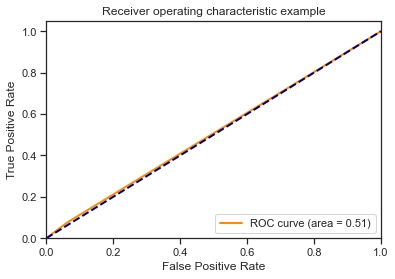

In [92]:
# Для 2 ближайших соседей
draw_roc_curve(bin_wine_y_test, bin_target1_1, pos_label=1, average='micro')

In [93]:
# Для 10 ближайших соседей
bin_cl1_2 = KNeighborsClassifier(n_neighbors=10)
bin_cl1_2.fit(wine_X_train, bin_wine_y_train)
proba_target2_1 = bin_cl1_2.predict_proba(wine_X_test)
true_proba_target2_1 = proba_target2_1[:,1]
roc_curve_k10_res = roc_curve(bin_wine_y_test, true_proba_target2_1, pos_label=1)
roc_curve_k10_res

(array([0.        , 0.01587302, 0.07936508, 0.25396825, 0.3968254 ,
        0.46031746, 0.49206349, 0.65079365, 1.        ]),
 array([0.        , 0.07692308, 0.07692308, 0.30769231, 0.53846154,
        0.57692308, 0.65384615, 0.73076923, 1.        ]),
 array([1.7, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ]))